In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import polars as pl
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Mezclando gene y SNPs en Loose

In [3]:
gene_loose=pd.read_csv("ResistanceGeneCountLooseBiofiltered.csv")
gene_loose

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3003312,3002775,3002774,3003974,3002725,3002778,3003311,3002779,3002782,3003304
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,5,3,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,4,9,5,4,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,7,11,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,6,10,7,9,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,9,13,4,6,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,14,11,5,9,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,11,13,8,6,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#gene_loose[["accession", "3004562"]]

In [5]:
SNP_loose=pd.read_csv("ResistanceSNPCountLooseBiofiltered.csv")
SNP_loose

/tmp/ipykernel_193555/3181678207.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  SNP_loose=pd.read_csv("ResistanceSNPCountLooseBiofiltered.csv")


,accession,genus,species,antibiotic,phenotype,measurement_value,3004562-I139R,3003294-S83L,3004562-D476N,3004562-S463A,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
index_borrados=SNP_loose.columns[6:].str.split("-").str.get(0).unique()
index_borrados

Index(['3004562', '3003294', '3003295', '3003995', '3003929', '3003309',
       '3003296', '3007751', '3003924', '3003818', '3003306', '3003305',
       '3003308', '3003310', '3003709', '3007752', '3000819', '3003307',
       '3003926', '3004860', '3003317', '3003807', '3003685', '3003684',
       '3003817', '3003316', '3003974', '3003381', '3003789', '3003383',
       '3003312', '3003297', '3003304'],
      dtype='object')

In [7]:
columnas_a_borrar = index_borrados.tolist()
columnas_a_borrar


['3004562',
 '3003294',
 '3003295',
 '3003995',
 '3003929',
 '3003309',
 '3003296',
 '3007751',
 '3003924',
 '3003818',
 '3003306',
 '3003305',
 '3003308',
 '3003310',
 '3003709',
 '3007752',
 '3000819',
 '3003307',
 '3003926',
 '3004860',
 '3003317',
 '3003807',
 '3003685',
 '3003684',
 '3003817',
 '3003316',
 '3003974',
 '3003381',
 '3003789',
 '3003383',
 '3003312',
 '3003297',
 '3003304']

In [8]:
df = gene_loose.drop(columns=columnas_a_borrar)
df

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3003931,3003702,3002767,3002775,3002774,3002725,3002778,3003311,3002779,3002782
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,5,3,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,4,9,5,4,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,7,11,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,6,10,7,9,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,9,13,4,6,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,14,11,5,9,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,11,13,8,6,...,0,0,0,0,0,0,0,0,0,0


In [9]:
columnas_a_agregar=SNP_loose.iloc[:,6:]
columnas_a_agregar

,3004562-I139R,3003294-S83L,3004562-D476N,3004562-S463A,3004562-V423F,3003294-D87N,3004562-V340L,3004562-P587S,3003294-S81L,3003294-S101L,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,2,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,2,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,2,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,2,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,2,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_loose = pd.concat([df, columnas_a_agregar], axis=1)
df_loose

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,5,3,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,4,9,5,4,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,7,11,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,6,10,7,9,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,9,13,4,6,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,14,11,5,9,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,11,13,8,6,...,0,0,0,0,0,0,0,0,0,0


In [11]:
!pwd

/home/jupyter-yesenia/Resistencia


In [12]:
df_loose.to_csv("ResistanceJoinedLooseBiofiltered.tsv.gz", sep="\t", compression="gzip")

# Mezclando gene y SNPs en Strict

In [13]:
SNP_strict=pd.read_csv("ResistanceSNPCountStrictBiofiltered.csv")
SNP_strict

,accession,genus,species,antibiotic,phenotype,measurement_value,3003294-S83L,3003294-D87N,3003294-D87Y,3007751-S83F,...,3007751-D87G,3003807-Y114F,3003807-R45C,3003807-V165I,3007751-D87Y,3003926-D87Y,3003709-G46S,3003381-R20H,3003926-S83I,3003381-G121D
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
gene_strict=pd.read_csv("ResistanceGeneCountStrictBiofiltered.csv")
gene_strict

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000499,3000656,3000676,...,3000815,3003189,3002791,3002724,3002719,3005112,3004636,3000024,3000025,3007402
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
A=gene_loose[gene_loose['3004562']==3]
A

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3003312,3002775,3002774,3003974,3002725,3002778,3003311,3002779,3002782,3003304
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
6,GCA_003029495,Acinetobacter,baumannii,meropenem,Resistant,8.0,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
29,SRR3057118,Acinetobacter,baumannii,meropenem,Resistant,16.0,5,11,5,3,...,0,0,0,0,0,0,0,0,0,0
33,SRR3131127,Acinetobacter,baumannii,meropenem,Resistant,16.0,6,12,5,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7613,SRR3198632,Salmonella,enterica,ciprofloxacin,NaN,NaN,10,15,6,8,...,0,0,0,0,0,0,0,0,0,0
7614,SRR2407619,Salmonella,enterica,ciprofloxacin,NaN,NaN,10,13,8,6,...,0,0,0,0,0,0,0,0,0,0
7631,SRR4280632,Salmonella,enterica,ciprofloxacin,NaN,NaN,10,13,8,6,...,0,0,0,0,0,0,0,0,0,0
7669,SRR3115243,Salmonella,enterica,ciprofloxacin,NaN,NaN,10,13,8,6,...,0,0,0,0,0,0,0,0,0,0


In [16]:
gene_loose[['accession','genus','species','antibiotic','phenotype','measurement_value','3004562']]

,accession,genus,species,antibiotic,phenotype,measurement_value,3004562
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,3
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,2
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,1
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,3
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,2
...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,2
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,2
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,2
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,2


In [17]:
gene_loose[]

SyntaxError: invalid syntax (3440111472.py, line 1)

In [ ]:
SNP_loose.iloc[:,:12]

In [ ]:
index_borrados_2=SNP_strict.columns[6:].str.split("-").str.get(0)
index_borrados_2

In [ ]:
columnas_a_borrar_2 = index_borrados_2.tolist()
columnas_a_borrar_2

In [18]:
df = gene_strict.drop(columns=columnas_a_borrar_2)
df

NameError: name 'columnas_a_borrar_2' is not defined

In [19]:
columnas_a_agregar_2=SNP_strict.iloc[:,6:]
columnas_a_agregar_2

,3003294-S83L,3003294-D87N,3003294-D87Y,3007751-S83F,3007751-D87N,3007751-S83I,3003709-G195E,3003709-V165I,3000819-S32N,3000819-M109I,3007751-D87G,3003807-Y114F,3003807-R45C,3003807-V165I,3007751-D87Y,3003926-D87Y,3003709-G46S,3003381-R20H,3003926-S83I,3003381-G121D
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_strict = pd.concat([df, columnas_a_agregar], axis=1)
df_strict

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,5,3,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,4,9,5,4,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,7,11,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,6,10,7,9,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,9,13,4,6,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,14,11,5,9,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,11,13,8,6,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_strict.to_csv("ResistanceJoinedStrictBiofiltered.tsv.gz", sep="\t", compression="gzip")

In [22]:
Test_strict=df_strict[df_strict.phenotype.isna()]
Test_strict

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
5952,ERR1417717,Escherichia,coli,ciprofloxacin,NaN,NaN,13,18,6,7,...,0,0,0,0,0,0,0,0,0,0
5953,ERR1417719,Escherichia,coli,ciprofloxacin,NaN,NaN,13,18,6,7,...,0,0,0,0,0,0,0,0,0,0
5954,ERR1417722,Escherichia,coli,ciprofloxacin,NaN,NaN,13,21,7,7,...,0,0,0,0,0,0,0,0,0,0
5955,ERR1417741,Escherichia,coli,ciprofloxacin,NaN,NaN,14,19,5,5,...,0,0,0,0,0,0,0,0,0,0
5956,ERR1417745,Escherichia,coli,ciprofloxacin,NaN,NaN,13,16,6,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,6,10,7,9,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,9,13,4,6,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,14,11,5,9,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,11,13,8,6,...,0,0,0,0,0,0,0,0,0,0


# Separando y entendiendo datos de entrenamiento en Strict

In [23]:
Train_strict=df_strict.dropna()
Train_strict

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.000,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.000,5,8,5,3,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.000,4,9,5,4,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.000,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.000,7,11,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,10,13,4,7,...,0,0,0,0,0,0,0,0,0,0
5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,8,13,4,6,...,0,0,0,0,0,0,0,0,0,0
5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,8,13,5,7,...,0,0,0,0,0,0,0,0,0,0
5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,9,14,5,7,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Train_strict['antibiotic'].value_counts()

antibiotic
meropenem        3134
ciprofloxacin    2818
Name: count, dtype: int64

In [25]:
Train_strict['species'].value_counts()

species
enterica       2165
pneumoniae     1997
aeruginosa      536
jejuni          475
baumannii       269
coli            264
gonorrhoeae     178
cloacae          68
Name: count, dtype: int64

In [26]:
Train_strict['phenotype'].value_counts()

phenotype
Susceptible    4574
Resistant      1378
Name: count, dtype: int64

In [27]:
single_value_columns = Train_strict.columns[Train_strict.nunique() == 1]
len(single_value_columns)

59

In [28]:
single_value_columns

Index(['3003925', '3003298', '3003295-D89N', '3003295-A91T', '3003296-A88P',
       '3003296-A84P', '3003296-S91P', '3003296-S85P', '3003296-S84P',
       '3003295-D95Y', '3003295-D94Y', '3004562-S416A', '3004562-W91R',
       '3004562-G111S', '3003818-S83N', '3003818-E87Q', '3003308-P116A',
       '3003308-V103I', '3003308-V104I', '3003818-E88K', '3003995-R90K',
       '3003995-A66T', '3003995-D103N', '3003294-S91P', '3003709-G46S',
       '3003684-A67S', '3003684-H80R', '3003684-S91I', '3003684-T86I',
       '3003684-A85T', '3003684-M95I', '3003684-T82I', '3003684-S83I',
       '3003684-P116A', '3003684-S80I', '3003817-S84L', '3003817-S81L',
       '3003817-S83L', '3003818-A85T', '3003295-G88C', '3003995-D71G',
       '3003316-D476N', '3003316-P587S', '3003308-E84G', '3003308-D87G',
       '3003308-D94G', '3003995-S97P', '3003295-A67S', '3003295-D89V',
       '3003295-T80A', '3004562-T539N', '3003995-K149R', '3003995-L345I',
       '3004562-E399K', '3003789-T86I', '3003789-T82I', '30

In [29]:
columnas_valor_unico = single_value_columns.tolist()
columnas_valor_unico

['3003925',
 '3003298',
 '3003295-D89N',
 '3003295-A91T',
 '3003296-A88P',
 '3003296-A84P',
 '3003296-S91P',
 '3003296-S85P',
 '3003296-S84P',
 '3003295-D95Y',
 '3003295-D94Y',
 '3004562-S416A',
 '3004562-W91R',
 '3004562-G111S',
 '3003818-S83N',
 '3003818-E87Q',
 '3003308-P116A',
 '3003308-V103I',
 '3003308-V104I',
 '3003818-E88K',
 '3003995-R90K',
 '3003995-A66T',
 '3003995-D103N',
 '3003294-S91P',
 '3003709-G46S',
 '3003684-A67S',
 '3003684-H80R',
 '3003684-S91I',
 '3003684-T86I',
 '3003684-A85T',
 '3003684-M95I',
 '3003684-T82I',
 '3003684-S83I',
 '3003684-P116A',
 '3003684-S80I',
 '3003817-S84L',
 '3003817-S81L',
 '3003817-S83L',
 '3003818-A85T',
 '3003295-G88C',
 '3003995-D71G',
 '3003316-D476N',
 '3003316-P587S',
 '3003308-E84G',
 '3003308-D87G',
 '3003308-D94G',
 '3003995-S97P',
 '3003295-A67S',
 '3003295-D89V',
 '3003295-T80A',
 '3004562-T539N',
 '3003995-K149R',
 '3003995-L345I',
 '3004562-E399K',
 '3003789-T86I',
 '3003789-T82I',
 '3003789-S91I',
 '3003383-G97D',
 '3003383-E

In [30]:
len(columnas_valor_unico)

59

In [31]:
columnas_valor_unico[3]

'3003295-A91T'

In [32]:
for x in columnas_valor_unico:
    print(Train_strict[x].value_counts())
 

3003925
0    5952
Name: count, dtype: int64
3003298
0    5952
Name: count, dtype: int64
3003295-D89N
0    5952
Name: count, dtype: int64
3003295-A91T
0    5952
Name: count, dtype: int64
3003296-A88P
0    5952
Name: count, dtype: int64
3003296-A84P
0    5952
Name: count, dtype: int64
3003296-S91P
0    5952
Name: count, dtype: int64
3003296-S85P
0    5952
Name: count, dtype: int64
3003296-S84P
0    5952
Name: count, dtype: int64
3003295-D95Y
0    5952
Name: count, dtype: int64
3003295-D94Y
0    5952
Name: count, dtype: int64
3004562-S416A
0    5952
Name: count, dtype: int64
3004562-W91R
0    5952
Name: count, dtype: int64
3004562-G111S
0    5952
Name: count, dtype: int64
3003818-S83N
0    5952
Name: count, dtype: int64
3003818-E87Q
0    5952
Name: count, dtype: int64
3003308-P116A
0    5952
Name: count, dtype: int64
3003308-V103I
0    5952
Name: count, dtype: int64
3003308-V104I
0    5952
Name: count, dtype: int64
3003818-E88K
0    5952
Name: count, dtype: int64
3003995-R90K
0    5952
Na

# Algoritmos

In [33]:
algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', gamma='auto', C=1, random_state=42),
    "SVM (Polynomial Kernel)": SVC(kernel='poly', gamma='auto', C=1, random_state=42),
    "MLP (1 Hidden Layer, 200 neurons)": MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gaussian NB": GaussianNB()
}

results = {}

In [34]:
# Loose

In [35]:
df=Train_strict
df

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,3003923,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.000,6,10,6,3,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.000,5,8,5,3,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.000,4,9,5,4,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.000,5,8,6,5,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.000,7,11,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,10,13,4,7,...,0,0,0,0,0,0,0,0,0,0
5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,8,13,4,6,...,0,0,0,0,0,0,0,0,0,0
5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,8,13,5,7,...,0,0,0,0,0,0,0,0,0,0
5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,9,14,5,7,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Define the output folder
output_folder = "model_results_Train_strict"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

df_numeric = df.iloc[:,6:]

In [37]:
# Escalar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [38]:
# Aplicar PCA inicialmente para determinar el número de componentes
pca = PCA()
pca.fit(X_scaled)

PCA()

In [39]:
# DEMASIADOS 1's: HAY COMPONENTES QUE NO EXPLICAN NADA
# Calcula la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.08556239, 0.14694234, 0.19635274, 0.23462193, 0.26660386,
       0.29054786, 0.31163483, 0.3320996 , 0.35050864, 0.36679866,
       0.38198922, 0.39589889, 0.40907421, 0.42148941, 0.43258762,
       0.44316347, 0.45363989, 0.46378545, 0.47380767, 0.4837982 ,
       0.49374749, 0.503093  , 0.51164263, 0.51997965, 0.52805264,
       0.53563487, 0.54314083, 0.55061209, 0.55794969, 0.56508056,
       0.57212662, 0.57911873, 0.58594215, 0.59263401, 0.5990799 ,
       0.60542753, 0.61162302, 0.61755679, 0.62334686, 0.62899989,
       0.63426558, 0.63951158, 0.64466228, 0.64975604, 0.6548255 ,
       0.65987478, 0.66492034, 0.66992977, 0.67490783, 0.67985396,
       0.68476391, 0.68961627, 0.69442219, 0.69909426, 0.70366666,
       0.70807256, 0.71237071, 0.71656967, 0.72064834, 0.72467559,
       0.72867348, 0.73255375, 0.73634107, 0.74009763, 0.74376983,
       0.74735637, 0.75084548, 0.75425381, 0.75764734, 0.76099922,
       0.76426542, 0.76748896, 0.77067401, 0.77376397, 0.77683

In [39]:
# Encuentra el número de componentes que alcanzan el 90% de la varianza
n_components = np.where(cumulative_variance >=0.9)[0][0] + 1

In [40]:
n_components

78

In [41]:
# Aplica PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [42]:
# Convertir a DataFrame
X_pca_df = pd.DataFrame(X_pca, index=df.index)

In [59]:
# Agrega las primeras 5 columnas de df a X_pca_df
df_pca = pd.concat([df.iloc[:, :5], X_pca_df], axis=1)

In [60]:
df_pca

,accession,genus,species,antibiotic,phenotype,0,1,2,3,4,...,68,69,70,71,72,73,74,75,76,77
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,-1.000415,-0.436219,0.381186,2.450332,-0.096537,...,0.248478,-0.083216,0.189597,0.044101,0.014228,-0.002760,0.024724,0.054370,-0.091984,0.255629
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,-1.000415,-0.436219,0.381186,2.450332,-0.096537,...,0.248478,-0.083216,0.189597,0.044101,0.014228,-0.002760,0.024724,0.054370,-0.091984,0.255629
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,-0.190875,-0.058449,0.489337,4.103812,1.757452,...,0.335689,0.434883,0.253260,0.715950,-0.270232,0.247078,1.009473,-0.692642,-1.119548,1.634368
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,-1.123904,-0.490947,0.428203,2.874922,-0.365570,...,-0.108759,0.084684,-0.124339,-0.062609,0.033065,0.019092,-0.055311,-0.094580,0.097190,-0.124964
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,-1.044547,-0.436302,0.352689,2.120151,-0.005725,...,0.167695,0.360158,0.396879,-0.248030,-0.227659,-0.085984,0.093926,-0.037188,0.021742,0.282804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,-1.345549,-0.664342,0.265137,1.585192,-2.299047,...,0.003446,0.027654,-0.006872,-0.019286,0.002684,0.018216,-0.014402,0.019258,-0.041135,0.001980
5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,-1.345549,-0.664342,0.265137,1.585192,-2.299047,...,0.003446,0.027654,-0.006872,-0.019286,0.002684,0.018216,-0.014402,0.019258,-0.041135,0.001980
5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,-1.345549,-0.664342,0.265137,1.585192,-2.299047,...,0.003446,0.027654,-0.006872,-0.019286,0.002684,0.018216,-0.014402,0.019258,-0.041135,0.001980
5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,-1.345549,-0.664342,0.265137,1.585192,-2.299047,...,0.003446,0.027654,-0.006872,-0.019286,0.002684,0.018216,-0.014402,0.019258,-0.041135,0.001980


In [61]:
# Filtra el DataFrame por la columna 'phenotype'
#entrenar solo con los datos que ya tenemos "resueltos"
#df_training = df_pca[df_pca['phenotype'].isin(['Susceptible', 'Resistant'])]
#df_test = df_pca[df_pca['phenotype'].isna()]

In [64]:
# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = Train_strict.iloc[:,6:]
df_filtrado_test = Test_strict.iloc[:,6:]

In [65]:
df_filtrado

,3000502,3000499,3000656,3000676,3003378,3000237,3003308,3003511,3004597,3002734,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5950,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_filtrado_test

,3000502,3000499,3000656,3000676,3003378,3000237,3003308,3003511,3004597,3002734,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
5952,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5953,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5954,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5955,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5956,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
Train_strict

,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000499,3000656,3000676,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_training=Train_strict
df_test=Test_strict

In [70]:
#Cambiar susceptible y resistente por 1's y 0´s
labels = df_training['phenotype']
label_encoder = LabelEncoder()

In [71]:
# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)


In [72]:
# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

In [73]:
for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = algo.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': cm}

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta verdadera')
    plt.xticks(ticks=[0.5, 1.5], labels=['Resistant', 'Susceptible'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Resistant', 'Susceptible'])
    plt.title('Matriz de Confusión - ' + algo_name)

    # Save confusion matrix plot
    plt.savefig(os.path.join(output_folder, algo_name + "_confusion_matrix.png"))
    plt.close()
    
    # Make predictions on df_test
    test_predictions = algo.predict(df_filtrado_test)

    # Save the predictions to a CSV file
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pd.DataFrame({
        'accession': df_test.accession,
        'prediction': test_predictions_labels
    })
    test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), index=False)


In [74]:
# Save overall results to CSV
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv(os.path.join(output_folder, "results2.csv"))

In [143]:
pd.read_csv("ResistanceCategories.csv")

,ARO,Gene Name,Antibiotic,AMR Gene Family,Drug Class,Resistance Mechanism
0,3000005,vanD,"vancomycin, teicoplanin","glycopeptide resistance gene cluster, Van ligase",glycopeptide antibiotic,antibiotic target alteration
1,3000010,vanA,"vancomycin, teicoplanin","glycopeptide resistance gene cluster, Van ligase",glycopeptide antibiotic,antibiotic target alteration
2,3000013,vanB,vancomycin,"glycopeptide resistance gene cluster, Van ligase",glycopeptide antibiotic,antibiotic target alteration
3,3000024,patA,"ciprofloxacin, norfloxacin",ATP-binding cassette (ABC) antibiotic efflux pump,fluoroquinolone antibiotic,antibiotic efflux
4,3000025,patB,"ciprofloxacin, norfloxacin",ATP-binding cassette (ABC) antibiotic efflux pump,fluoroquinolone antibiotic,antibiotic efflux
...,...,...,...,...,...,...
5156,3007695,CMY-185,NaN,CMY beta-lactamase,cephamycin,antibiotic inactivation
5157,3007749,Salmonella gallinarum folP with mutation confe...,sulfamethoxazole,sulfonamide resistant dihydropteroate synthase...,sulfonamide antibiotic,antibiotic target alteration
5158,3007751,Salmonella isangi gyrA conferring resistance t...,"ciprofloxacin, nalidixic acid",fluoroquinolone resistant gyrA,fluoroquinolone antibiotic,antibiotic target alteration
5159,3007752,Salmonella isangi gyrB conferring resistance t...,"ciprofloxacin, nalidixic acid",fluoroquinolone resistant gyrB,fluoroquinolone antibiotic,antibiotic target alteration


# Ideas:
Usar strict filtrado sólo con un antibiótico, pero sólo con los genes que generan resistencia a dicho antibiótico
Usar métodos con eso
-Repetir lo mismo que antes pero usando técnica de reducción de dimensión primero

Usar loose filtrado sólo con un antibiótico, pero sólo con los genes que generan resistencia a dicho antibiótico. Ponerle peso mayor a los que son strict que a los loose y 
-Repetir lo mismo que antes pero usando técnica de reducción de dimensión primero

In [146]:
!pwd

/home/jupyter-yesenia/Resistencia


In [148]:
from pathlib import Path

In [160]:
def main_M_S():
    # Read DataSets directory from parameter, and setup metadata and file dirs
    datasets = "."
    metadata_file = f"{datasets}/ResistanceCategories.csv"
    files = [
        Path(f"{datasets}/ResistanceJoinedStrictBiofiltered.tsv.gz"),
        Path(f"{datasets}/ResistanceJoinedLooseBiofiltered.tsv.gz"),
          ]
    output = Path(f"{datasets}")

    # Create output directory
    #os.makedirs(output, exist_ok=True)

    # Read metadata table and filter to gene AROs of interest
    metadata = pd.read_csv(
        metadata_file, index_col="ARO", usecols=["ARO", "Antibiotic"]
    )["Antibiotic"].str.split(", ").explode()
    aro = set(
        metadata[metadata.isin(["meropenem"])]
        .index.unique().astype(str)
    )
    
    # Read each file
    index_col = [
        "accession", "genus", "species",
        "antibiotic", "phenotype", "measurement_value"
    ]
    for file in files:
        data = pd.read_csv(
            file, low_memory=False, sep='\t',
            index_col=index_col, dtype=str
        )
        valid = data.columns[
            data.columns.str.split("-").str.get(0).isin(aro)
        ]
        # Filter columns depending on file type
        #if "SNP" in file.name:
        #    valid = data.columns[
        #        data.columns.str.split("-").str.get(0).isin(aro)
        #    ]
        #else:
        #    valid = data.columns[data.columns.isin(aro)]
        
        # Save filtered table
        data[valid].to_csv(
            f"{output}/{file.stem[:-4]}Meropenem.tsv.gz",
            compression="gzip",
            sep="\t"
        )


In [161]:
main_M_S()

In [162]:
Meropenem=pd.read_csv("ResistanceJoinedStrictBiofilteredMeropenem.tsv.gz", sep='\t' )
Meropenem

,accession,genus,species,antibiotic,phenotype,measurement_value,3000589,3001397,3005068,3005067,...,3000377,3000378,3000379,3003039,3007402,3003709-G195E,3003709-V165I,3000819-M109I,3000819-S32N,3003709-G46S
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
Meropenem.iloc[:, 6:].sum(axis=1)

0       0
1       0
2       0
3       0
4       1
       ..
7767    0
7768    0
7769    0
7770    0
7771    0
Length: 7772, dtype: int64

In [ ]:
def main_M_S():
    # Read DataSets directory from parameter, and setup metadata and file dirs
    datasets = "."
    metadata_file = f"{datasets}/ResistanceCategories.csv"
    files = [
        Path(f"{datasets}/ResistanceJoinedStrictBiofiltered.tsv.gz"),
        Path(f"{datasets}/ResistanceJoinedLooseBiofiltered.tsv.gz"),
          ]
    output = Path(f"{datasets}")

    # Create output directory
    #os.makedirs(output, exist_ok=True)

    # Read metadata table and filter to gene AROs of interest
    metadata = pd.read_csv(
        metadata_file, index_col="ARO", usecols=["ARO", "Antibiotic"]
    )["Antibiotic"].str.split(", ").explode()
    aro = set(
        metadata[metadata.isin(["meropenem"])]
        .index.unique().astype(str)
    )
    
    # Read each file
    index_col = [
        "accession", "genus", "species",
        "antibiotic", "phenotype", "measurement_value"
    ]
    for file in files:
        data = pd.read_csv(
            file, low_memory=False, sep='\t',
            index_col=index_col, dtype=str
        )
        valid = data.columns[
            data.columns.str.split("-").str.get(0).isin(aro)
        ]
        # Filter columns depending on file type
        #if "SNP" in file.name:
        #    valid = data.columns[
        #        data.columns.str.split("-").str.get(0).isin(aro)
        #    ]
        #else:
        #    valid = data.columns[data.columns.isin(aro)]
        
        # Save filtered table
        data[valid].to_csv(
            f"{output}/{file.stem[:-4]}Meropenem.tsv.gz",
            compression="gzip",
            sep="\t"
        )


In [164]:
import matplotlib.pyplot as plt

In [173]:
Meropenem_resistant=Meropenem[Meropenem.phenotype=='Resistant']
Meropenem_susceptible=Meropenem[Meropenem.phenotype=='Susceptible']
Meropenem_susceptible

,accession,genus,species,antibiotic,phenotype,measurement_value,3000589,3001397,3005068,3005067,...,3000377,3000378,3000379,3003039,3007402,3003709-G195E,3003709-V165I,3000819-M109I,3000819-S32N,3003709-G46S
9,GCF_000972525,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,GCF_001441355,Acinetobacter,baumannii,meropenem,Susceptible,0.500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,GCF_001441405,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,GCF_001441415,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,GCF_001441455,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
Meropenem_resistant_not_zero=Meropenem_resistant[Meropenem_resistant.iloc[:, 6:].sum(axis=1)!=0]
Meropenem_resistant_not_zero

,accession,genus,species,antibiotic,phenotype,measurement_value,3000589,3001397,3005068,3005067,...,3000377,3000378,3000379,3003039,3007402,3003709-G195E,3003709-V165I,3000819-M109I,3000819-S32N,3003709-G46S
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,GCA_003260505,Enterobacter,cloacae,meropenem,Resistant,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,GCA_003288475,Enterobacter,cloacae,meropenem,Resistant,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760,SRR3168645,Enterobacter,cloacae,meropenem,Resistant,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,GCA_002180095,Escherichia,coli,meropenem,Resistant,16.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,SRR5122329,Pseudomonas,aeruginosa,meropenem,Resistant,8.0,1,0,1,1,...,1,1,1,0,0,0,0,0,0,0
3784,SRR5122330,Pseudomonas,aeruginosa,meropenem,Resistant,8.0,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
3785,SRR5122331,Pseudomonas,aeruginosa,meropenem,Resistant,8.0,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
3786,SRR5122332,Pseudomonas,aeruginosa,meropenem,Resistant,8.0,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0


(array([1.114e+03, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 5.000e+00,
        1.030e+02, 1.280e+02, 1.700e+01, 7.000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

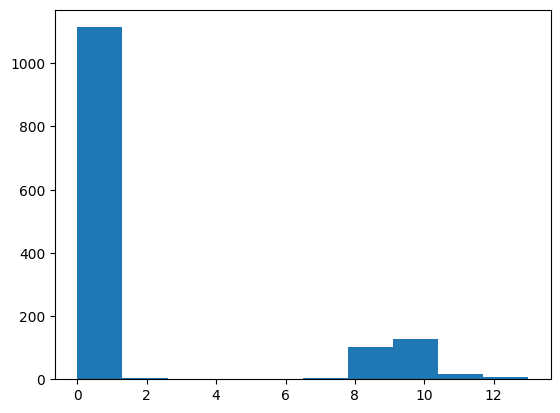

In [216]:
plt.hist(Meropenem_resistant.iloc[:, 6:].sum(axis=1))

In [232]:
Meropenem_susceptible

,accession,genus,species,antibiotic,phenotype,measurement_value,3000589,3001397,3005068,3005067,...,3000377,3000378,3000379,3003039,3007402,3003709-G195E,3003709-V165I,3000819-M109I,3000819-S32N,3003709-G46S
9,GCF_000972525,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,GCF_001441355,Acinetobacter,baumannii,meropenem,Susceptible,0.500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,GCF_001441405,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,GCF_001441415,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,GCF_001441455,Acinetobacter,baumannii,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
Meropenem_suscpeptible_not_zero=Meropenem_susceptible[Meropenem_susceptible.iloc[:, 6:].sum(axis=1)!=0]
Meropenem_suscpeptible_not_zero

,accession,genus,species,antibiotic,phenotype,measurement_value,3000589,3001397,3005068,3005067,...,3000377,3000378,3000379,3003039,3007402,3003709-G195E,3003709-V165I,3000819-M109I,3000819-S32N,3003709-G46S
1148,GCA_900181085,Klebsiella,pneumoniae,meropenem,Susceptible,0.250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1657,SRR5385737,Klebsiella,pneumoniae,meropenem,Susceptible,1.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1878,SRR5385996,Klebsiella,pneumoniae,meropenem,Susceptible,1.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,SRR5386049,Klebsiella,pneumoniae,meropenem,Susceptible,1.000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1953,SRR5386098,Klebsiella,pneumoniae,meropenem,Susceptible,1.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,SRR4417559,Pseudomonas,aeruginosa,meropenem,Susceptible,2.000,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
3778,SRR4417561,Pseudomonas,aeruginosa,meropenem,Susceptible,2.000,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
3779,SRR4417562,Pseudomonas,aeruginosa,meropenem,Susceptible,2.000,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
3780,SRR4417563,Pseudomonas,aeruginosa,meropenem,Susceptible,0.250,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0


(array([ 10.,   0.,   1.,   0.,   0.,   5.,  25.,  79., 161.,   4.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

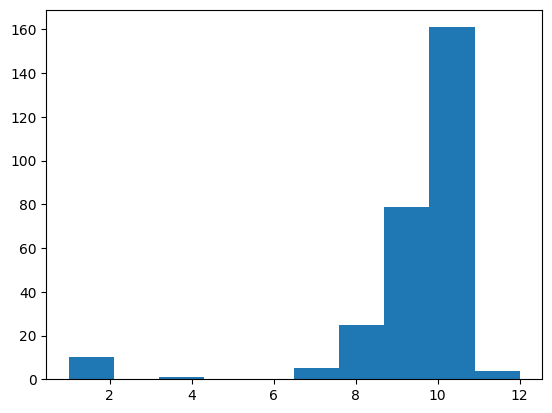

In [238]:
plt.hist(Meropenem_suscpeptible_not_zero.iloc[:, 6:].sum(axis=1))

In [218]:
import pandas as pd

In [219]:
Meropenem_resistant.iloc[:, 6:].sum(axis=1).value_counts()

0     1060
10     128
9       89
1       54
11      17
8       14
12       6
7        5
2        3
13       1
5        1
Name: count, dtype: int64

In [220]:
Meropenem_resistant.iloc[:, 6:].sum(axis=1).value_counts(normalize=True)

0     0.769231
10    0.092888
9     0.064586
1     0.039187
11    0.012337
8     0.010160
12    0.004354
7     0.003628
2     0.002177
13    0.000726
5     0.000726
Name: proportion, dtype: float64

(array([4.299e+03, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 5.000e+00,
        2.500e+01, 7.900e+01, 1.610e+02, 4.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

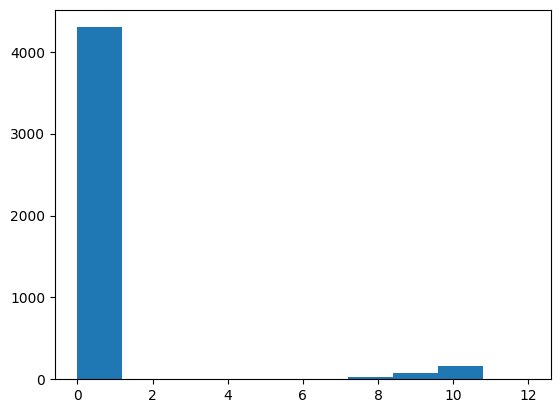

In [221]:
plt.hist(Meropenem_susceptible.iloc[:, 6:].sum(axis=1))

In [208]:
Meropenem_susceptible.iloc[:, 6:].sum(axis=1).value_counts()

0     4289
10     161
9       79
8       25
1       10
7        5
12       2
11       2
4        1
Name: count, dtype: int64

In [211]:
Meropenem_susceptible.iloc[:, 6:].sum(axis=1).value_counts(normalize=True)

0     0.937691
10    0.035199
9     0.017272
8     0.005466
1     0.002186
7     0.001093
12    0.000437
11    0.000437
4     0.000219
Name: proportion, dtype: float64

(array([ 57.,   0.,   0.,   1.,   0.,  19.,  89., 128.,  17.,   7.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

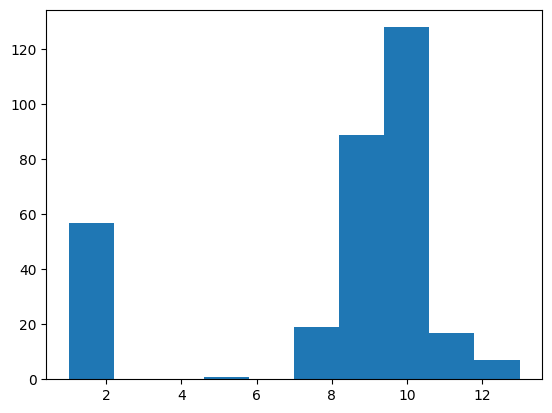

In [240]:
plt.hist(Meropenem_resistant_not_zero.iloc[:, 6:].sum(axis=1))

In [250]:
Meropenem_suscpeptible_not_zero.iloc[:, 6:].sum(axis=0)

3000589            1
3001397            7
3005068          274
3005067          260
3003033          270
3000818          265
3004056          197
3004054          271
3000506          263
3000377          267
3000378          261
3000379          267
3003039            4
3007402            1
3003709-G195E      3
3003709-V165I      3
3000819-M109I      1
3000819-S32N       1
3003709-G46S       0
dtype: int64

In [247]:
Meropenem_resistant_not_zero.iloc[:, 6:].sum(axis=0)

3000589           53
3001397           37
3005068          260
3005067          250
3003033          248
3000818          248
3004056          184
3004054          257
3000506          245
3000377          259
3000378          251
3000379          251
3003039            4
3007402            0
3003709-G195E      8
3003709-V165I      8
3000819-M109I      1
3000819-S32N       1
3003709-G46S       0
dtype: int64